In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn import metrics
import sys
import copy
import statsmodels.api as sm
pd.options.mode.chained_assignment = None
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 2000
%matplotlib inline

dfTemp=pd.read_csv(r'C:\Users\Jaesung Park\Desktop\FP\GroupProject\final.csv',keep_default_na=False)

In [2]:
dataset = pd.get_dummies(dfTemp, drop_first=True)
dataset = dataset[dataset.columns.difference(['PID','Order','Total Bsmt SF'])]
# mix the dataset
dataset = dataset.reindex(np.random.permutation(dataset.index))
five = [] # 4 in. 5 percent
for i in range(len(dataset.columns)):
    if dataset.columns[i] not in ([ 'SalePrice','Gr Liv Area', 'Garage Area', 'Garage Cars', '1st Flr SF']):
        five.append(dataset.columns[i])


fifthteen = [] # 12 in. 15 percent
for i in range(len(dataset.columns)):
   if dataset.columns[i] not in ([ 'SalePrice','Gr Liv Area', 'Garage Area', 'Garage Cars', '1st Flr SF',
                     'Exter Qual_Gd', 'Exter Qual_TA', 'Exter Qual_other', 
                                'Kitchen Qual_TA', 'Kitchen Qual_other','Year Built',
                               'Mas Vnr Area', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_other',
                                  'Fireplace Qu_TA', 'Fireplace Qu_other','Fireplaces','BsmtFin SF 1'
                                 ]):
        fifthteen.append(dataset.columns[i])
        
thirty = [] # 24 in. 30 percent
for i in range(len(dataset.columns)):
  if dataset.columns[i] not in (['SalePrice', 'Gr Liv Area', 'Garage Area', 'Garage Cars', '1st Flr SF',
                     'Exter Qual_Gd', 'Exter Qual_TA', 'Exter Qual_other', 
                                'Kitchen Qual_TA', 'Kitchen Qual_other','Year Built',
                               'Mas Vnr Area', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_other',
                                  'Fireplace Qu_TA', 'Fireplace Qu_other','Fireplaces','BsmtFin SF 1',
                                 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_other', 'Bsmt Qual_Gd', 'Bsmt Qual_TA', 'Bsmt Qual_other',
        'Garage Yr Blt','BsmtFin Type 1_GLQ', 'BsmtFin Type 1_LwQ', 'BsmtFin Type 1_Rec',
       'BsmtFin Type 1_Unf', 'BsmtFin Type 1_other','Overall Qual', 'Garage Finish_RFn', 'Garage Finish_Unf',
       'Garage Finish_other','MS SubClass_160', 'MS SubClass_20', 'MS SubClass_30', 'MS SubClass_50',
       'MS SubClass_60', 'MS SubClass_70', 'MS SubClass_other', 'Sale Condition_Normal', 'Sale Condition_Partial',
       'Sale Condition_other','Mas Vnr Type_None',
       'Mas Vnr Type_Stone', 'Mas Vnr Type_other', 'Exterior 2nd_HdBoard',
       'Exterior 2nd_MetalSd', 'Exterior 2nd_Plywood', 'Exterior 2nd_VinylSd',
       'Exterior 2nd_Wd Sdng', 'Exterior 2nd_other', 'Wood Deck SF','Foundation_CBlock'                                    
                                 ]):
        thirty.append(dataset.columns[i])
        
half = [] # 반타작 39
for i in range(len(dataset.columns)):
        if dataset.columns[i] not in (['SalePrice', 'Gr Liv Area', 'Garage Area', 'Garage Cars', '1st Flr SF',
                     'Exter Qual_Gd', 'Exter Qual_TA', 'Exter Qual_other', 
                                'Kitchen Qual_TA', 'Kitchen Qual_other','Year Built',
                               'Mas Vnr Area', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_other',
                                  'Fireplace Qu_TA', 'Fireplace Qu_other','Fireplaces','BsmtFin SF 1',
                                 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_other', 'Bsmt Qual_Gd', 'Bsmt Qual_TA', 'Bsmt Qual_other',
        'Garage Yr Blt','BsmtFin Type 1_GLQ', 'BsmtFin Type 1_LwQ', 'BsmtFin Type 1_Rec',
       'BsmtFin Type 1_Unf', 'BsmtFin Type 1_other','Overall Qual', 'Garage Finish_RFn', 'Garage Finish_Unf',
       'Garage Finish_other','MS SubClass_160', 'MS SubClass_20', 'MS SubClass_30', 'MS SubClass_50',
       'MS SubClass_60', 'MS SubClass_70', 'MS SubClass_other', 'Sale Condition_Normal', 'Sale Condition_Partial',
       'Sale Condition_other','Mas Vnr Type_None',
       'Mas Vnr Type_Stone', 'Mas Vnr Type_other', 'Exterior 2nd_HdBoard',
       'Exterior 2nd_MetalSd', 'Exterior 2nd_Plywood', 'Exterior 2nd_VinylSd',
       'Exterior 2nd_Wd Sdng', 'Exterior 2nd_other', 'Wood Deck SF','Foundation_CBlock',
        'Garage Type_BuiltIn', 'Garage Type_Detchd', 'Garage Type_other','Exterior 1st_HdBoard',
       'Exterior 1st_MetalSd', 'Exterior 1st_Plywood', 'Exterior 1st_VinylSd',
       'Exterior 1st_Wd Sdng', 'Exterior 1st_other', 'Heating QC_Gd',
       'Heating QC_TA','Bsmt Full Bath', 'Half Bath','Full Bath','Open Porch SF'
         'Lot Shape_Reg', 'Lot Shape_other','Bsmt Exposure_Gd', 'Bsmt Exposure_Mn',
       'Bsmt Exposure_No', 'Bsmt Exposure_other','Lot Area', 'MS Zoning_RM',
       'MS Zoning_other','Roof Style_Hip',
       'Roof Style_other','Paved Drive_Y',
       'Paved Drive_other', 'Garage Qual_TA', 'Garage Qual_other']):
            half.append(dataset.columns[i])  
        
seventy = [] # 55 in. 70 percent
for i in range(len(dataset.columns)):
    if dataset.columns[i] in ([  'Condition 2_other','Pool Area','Low Qual Fin SF', 'Mo Sold',
                                #7 more
                                'Land Contour_HLS', 'Land Contour_Low',
       'Land Contour_Lvl','Street_Pave', 'Lot Config_CulDSac', 'Lot Config_Inside', 'Lot Config_other',
                                'House Style_1Story', 'House Style_2Story', 'House Style_SLvl',
       'House Style_other','Condition 1_Feedr', 'Condition 1_Norm', 'Condition 1_other',
                                'BsmtFin Type 2_Rec',
       'BsmtFin Type 2_Unf', 'BsmtFin Type 2_other', 'Exter Cond_TA', 'Exter Cond_other',
                               #9 more
        'Land Slope_Mod', 'Land Slope_Sev','Misc Feature_other','Utilities_other',
             'Yr Sold','Bsmt Half Bath','3Ssn Porch','Bldg Type_Duplex', 'Bldg Type_Twnhs',
       'Bldg Type_TwnhsE', 'Bldg Type_other','BsmtFin SF 2','Year Remod/Add']):
            
        seventy.append(dataset.columns[i])
        
eightyfive = [] # 67 in. 85 percent
for i in range(len(dataset.columns)):
     if dataset.columns[i] in ([  'Condition 2_other','Pool Area','Low Qual Fin SF', 'Mo Sold',
                                #7 more
                                'Land Contour_HLS', 'Land Contour_Low',
       'Land Contour_Lvl','Street_Pave', 'Lot Config_CulDSac', 'Lot Config_Inside', 'Lot Config_other',
                                'House Style_1Story', 'House Style_2Story', 'House Style_SLvl',
       'House Style_other','Condition 1_Feedr', 'Condition 1_Norm', 'Condition 1_other',
                                'BsmtFin Type 2_Rec',
       'BsmtFin Type 2_Unf', 'BsmtFin Type 2_other', 'Exter Cond_TA', 'Exter Cond_other']):
            eightyfive.append(dataset.columns[i])
        
ninetyfive = [] # 74 in. 95 percent
for i in range(len(dataset.columns)):
    if dataset.columns[i] in ([  'Condition 2_other','Pool Area','Low Qual Fin SF', 'Mo Sold' ]):
        ninetyfive.append(dataset.columns[i])
        


In [3]:
regressor = LinearRegression(fit_intercept=True)

#alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1, 10, 15, 20, 30, 40, 100]
#regressor=RidgeCV(alphas=alphas, store_cv_values=True)


In [4]:
## exclude the lefts
rounded = round(dataset.shape[0]/10)*10
left = dataset.shape[0] - rounded
left

5

In [5]:
testing2 = dataset.iloc[left:]

In [6]:
k = testing2.shape[0]
fold = 10
point = round(k/fold)
mylist = []

start = 0
end= point

In [7]:
# separating dataset into # number of folds and put each fold into list
for i in range(fold):
    x = testing2.iloc[start:end]
    start = start + point
    end = end + point
    mylist.append(x)

In [8]:
RidgeCV_MAE = []
RidgeCV_MSE = []
RidgeCV_RMSE = []
alphasL = []
r2_list = []
predicted = []

In [9]:
temp = copy.deepcopy(mylist)

In [10]:
for j in range(fold):
    mylist = copy.deepcopy(temp)
    testing_set = mylist[j]
    appended_data = []
    for z in range(fold):
        if not z == j:
            appended_data.append(mylist[z])
            
    training_set = pd.concat(appended_data, ignore_index = True)
    
    
    #mean imputation
    for p in range(len(testing_set.columns)):
       #if testing_set.columns[p] not in dataset.columns:
        if testing_set.columns[p] in five:
            testing_set[testing_set.columns[p]] = np.mean(training_set[training_set.columns[p]])
           
    
    testing_set_X = testing_set[dataset.columns.difference(['SalePrice'])]
    testing_set_Y = testing_set['SalePrice']
    training_set_X = training_set[dataset.columns.difference(['SalePrice'])]
    training_set_Y = training_set['SalePrice']

    ridge_mod = regressor.fit(training_set_X, training_set_Y)
    #alphasL.append(ridge_mod.alpha_)
    y_pred = regressor.predict(testing_set_X)
    MAE = metrics.mean_absolute_error(testing_set_Y, y_pred)
    MSE = metrics.mean_squared_error(testing_set_Y, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(testing_set_Y, y_pred))
    r2 = metrics.r2_score(testing_set_Y, y_pred)
    py = y_pred
    
    RidgeCV_MAE.append(MAE)
    RidgeCV_MSE.append(MSE)
    RidgeCV_RMSE.append(RMSE)
    r2_list.append(r2)
    predicted.append(py)


In [11]:
np.mean(RidgeCV_MAE)

39777.42328476837

In [12]:
np.mean(RidgeCV_MSE)

3339085049.6202745

In [13]:
np.mean(RidgeCV_RMSE)

57578.91945359551

In [14]:
alphasL

[]

In [15]:
np.mean(r2_list)

0.4680781061837049

In [16]:
cd = np.concatenate(predicted)
ab = testing2['SalePrice']

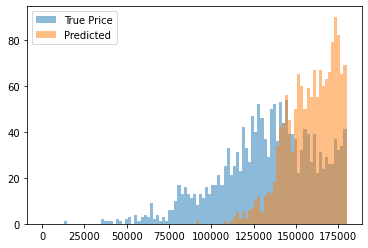

In [17]:
import numpy
bins = numpy.linspace(0, 180000, 100)
plt.hist(ab, bins, alpha=0.5, label='True Price')
plt.hist(cd, bins, alpha=0.5, label='Predicted')
plt.legend(loc='upper left')

plt.show()